In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

# Import combined climate and agriculture dataset for 2020/2021 season

In [136]:
#path='C:/Users/Leslie Aleman/Documents/IBDAP-rice-yields-main/Brazil Rice/Final datasets/final_combined_data_2020_2021.csv'
path = 'final_combined_data_2020_2021.csv'
df=pd.read_csv(path)
df.head()

,SAMPLE.VALUE,SAMPLE.COUNT,MEAN.VALUE,MEAN.COUNT,ANOM.VALUE,MIN.VALUE,MAX.VALUE,LST,SM,ESI,lon,lat,prec,month,year,region,Rice yield
0,0.42575,130898.5,0.44275,142443,-0.017,0.3645,0.5235,307.890968,-1.26064,-0.999553,-57.45,-33.65,0.076454,10,2020,RS,455.460274
1,0.42575,130898.5,0.44275,142443,-0.017,0.3645,0.5235,307.890968,-1.26064,-0.999553,-57.45,-33.55,0.070875,10,2020,RS,455.460274
2,0.42575,130898.5,0.44275,142443,-0.017,0.3645,0.5235,307.890968,-1.26064,-0.999553,-57.45,-33.45,0.066062,10,2020,RS,455.460274
3,0.42575,130898.5,0.44275,142443,-0.017,0.3645,0.5235,307.890968,-1.26064,-0.999553,-57.45,-33.35,0.062108,10,2020,RS,455.460274
4,0.42575,130898.5,0.44275,142443,-0.017,0.3645,0.5235,307.890968,-1.26064,-0.999553,-57.45,-33.25,0.058224,10,2020,RS,455.460274


In [223]:
df2 = df.drop(['month','year','region'],axis = 1)
df2['MEAN.COUNT'] = df['MEAN.COUNT'].astype(float)
df2.head()

,SAMPLE.VALUE,SAMPLE.COUNT,MEAN.VALUE,MEAN.COUNT,ANOM.VALUE,MIN.VALUE,MAX.VALUE,LST,SM,ESI,lon,lat,prec,Rice yield
0,0.42575,130898.5,0.44275,142443.0,-0.017,0.3645,0.5235,307.890968,-1.26064,-0.999553,-57.45,-33.65,0.076454,455.460274
1,0.42575,130898.5,0.44275,142443.0,-0.017,0.3645,0.5235,307.890968,-1.26064,-0.999553,-57.45,-33.55,0.070875,455.460274
2,0.42575,130898.5,0.44275,142443.0,-0.017,0.3645,0.5235,307.890968,-1.26064,-0.999553,-57.45,-33.45,0.066062,455.460274
3,0.42575,130898.5,0.44275,142443.0,-0.017,0.3645,0.5235,307.890968,-1.26064,-0.999553,-57.45,-33.35,0.062108,455.460274
4,0.42575,130898.5,0.44275,142443.0,-0.017,0.3645,0.5235,307.890968,-1.26064,-0.999553,-57.45,-33.25,0.058224,455.460274


<Axes: >

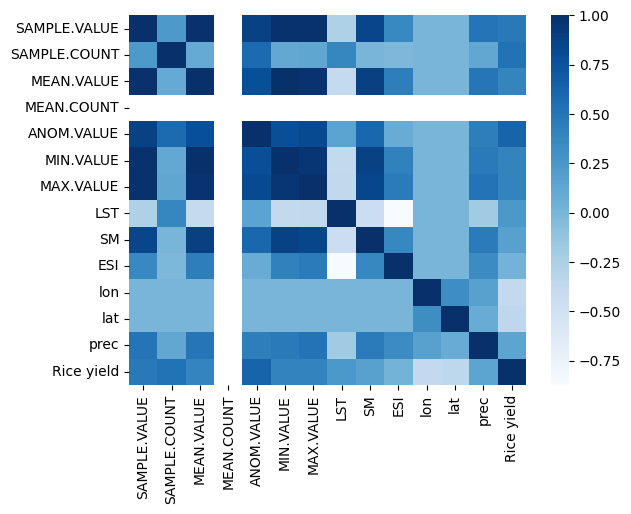

In [138]:
# plotting correlation heatmap without annotations
corr = df2.corr()
sns.heatmap(corr,cmap="Blues",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

<Axes: >

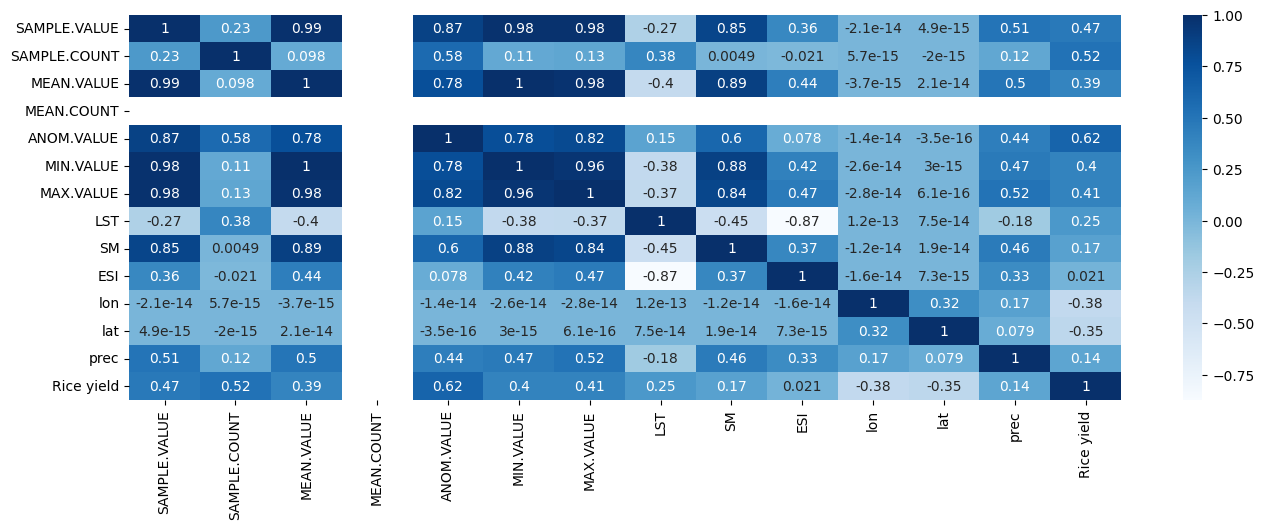

In [139]:
plt.figure(figsize = (16,5))
sns.heatmap(corr,cmap="Blues",
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

In [140]:
df2.columns

Index(['SAMPLE.VALUE', 'SAMPLE.COUNT', 'MEAN.VALUE', 'MEAN.COUNT',
       'ANOM.VALUE', 'MIN.VALUE', 'MAX.VALUE', 'LST', 'SM', 'ESI', 'lon',
       'lat', 'prec', 'Rice yield'],
      dtype='object')

# Drop redundant NDVI variables

In [141]:
df2.drop(['MEAN.VALUE','MEAN.COUNT','MIN.VALUE','MAX.VALUE'],axis=1,inplace=True)
df2.head()

,SAMPLE.VALUE,SAMPLE.COUNT,ANOM.VALUE,LST,SM,ESI,lon,lat,prec,Rice yield
0,0.42575,130898.5,-0.017,307.890968,-1.26064,-0.999553,-57.45,-33.65,0.076454,455.460274
1,0.42575,130898.5,-0.017,307.890968,-1.26064,-0.999553,-57.45,-33.55,0.070875,455.460274
2,0.42575,130898.5,-0.017,307.890968,-1.26064,-0.999553,-57.45,-33.45,0.066062,455.460274
3,0.42575,130898.5,-0.017,307.890968,-1.26064,-0.999553,-57.45,-33.35,0.062108,455.460274
4,0.42575,130898.5,-0.017,307.890968,-1.26064,-0.999553,-57.45,-33.25,0.058224,455.460274


In [142]:
from sklearn.model_selection import train_test_split

x = df2.drop(['Rice yield'],axis = 1).to_numpy()
y = df2['Rice yield'].values
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [144]:
print(x.shape)
print(y.shape)
print('x train:',x_train.shape)
print('y train',y_train.shape)

(38888, 9)
(38888,)
x train: (31110, 9)
y train (31110,)


# Lasso regression

In [201]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold,KFold
from sklearn.linear_model import Lasso

# define model
model = Lasso(max_iter=100000)
# define model evaluation method
cv = KFold(n_splits=10, shuffle=True, random_state=9)
# define grid
params = {'alpha': (np.logspace(-3, 3, 100))}
# define search
grid = GridSearchCV(model, params, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
grid.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=9, shuffle=True),
             estimator=Lasso(max_iter=100000), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480...
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03])},
             scoring='neg_mean_absolute_error')

### Best alpha found by gridsearch and best mean test score

In [202]:
print(grid.best_params_)
print('Mean test score: %.3f' % (grid.best_score_))

{'alpha': 0.001}
Mean test score: -100.689


### Calculate R^2 and RMSE

In [203]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_train_pred = grid.predict(x_train)
y_test_pred = grid.predict(x_test) 
 
print('R^2 train: %.3f, test: %.3f' %
       (r2_score(y_train,y_train_pred),
        r2_score(y_test, y_test_pred)))
print('\n')
print('RMSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train,y_train_pred,squared=False),
        mean_squared_error(y_test, y_test_pred,squared=False)))

R^2 train: 0.735, test: 0.749


RMSE train: 136.299, test: 132.268


### Rebuild Lasso model using optimal alpha value to see coefficients and intercept

In [149]:
best_alpha = grid.best_params_['alpha']
lasso = Lasso(alpha =best_alpha)
lasso.fit(x_train, y_train)

Lasso(alpha=0.001)

In [151]:
train_score = lasso.score(x_train, y_train)
print('R^2 train score: ',train_score)
test_score = lasso.score(x_test, y_test)
print('R^2 test score:',test_score)

R^2 train score:  0.7345415346715229
R^2 test score: 0.7490020255550337


### Get coefficients and intercept

In [152]:
coeffs = lasso.coef_
intercept = lasso.intercept_
print('Model coefficients: ',coeffs)
print('\n')
print('Model intercept: ',intercept)

Model coefficients:  [ 443.20569075   93.75437693 -224.30681935  190.66075196 -140.56767624
   86.00589129  -75.83602397  -68.37820422  -10.94343434]


Model intercept:  525.1144846125507


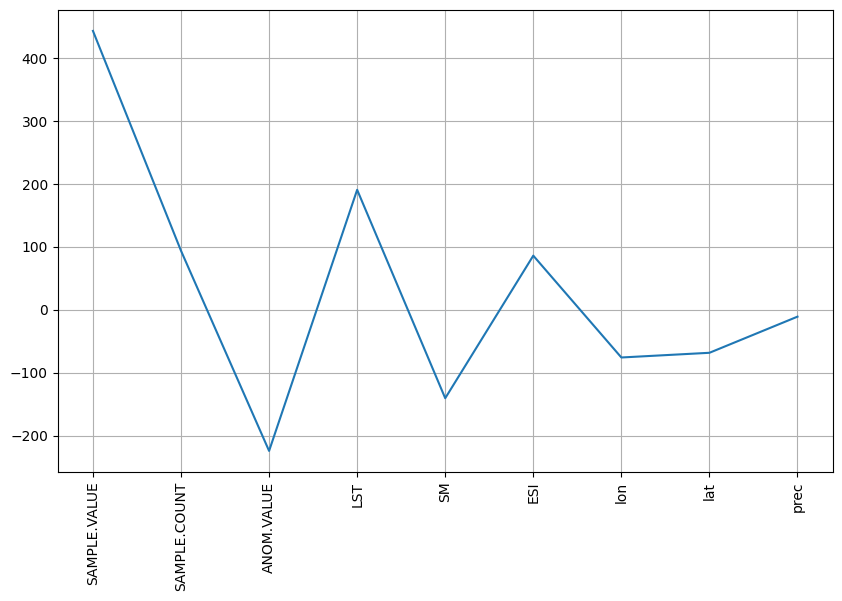

In [153]:
feature_labels = df2.drop(['Rice yield'],axis = 1).columns.values
plt.figure(figsize = (10, 6))
plt.plot(range(x.shape[1]), coeffs)
plt.xticks(range(x.shape[1]), feature_labels, rotation = 90)
plt.grid()
plt.show()

# Ridge regression

In [204]:
from sklearn.linear_model import Ridge
# define model
model2 = Ridge(solver='auto')
# define model evaluation method
cv = KFold(n_splits=10, shuffle=True, random_state=9)
# define grid
params2 = {'alpha': (np.arange(10,100, .1))}
# define search
grid2 = GridSearchCV(model2, params2, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
grid2.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=9, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
       12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
       13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 14...
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='neg_mean_absolute_error')

### Best alpha found by gridsearch and best mean test score

In [205]:
print(grid2.best_params_)
print('Mean test score: %.3f' % (grid2.best_score_))

{'alpha': 10.0}
Mean test score: -100.793


### Calculate R^2 and RMSE

In [206]:
y_train_pred2 = grid2.predict(x_train)
y_test_pred2 = grid2.predict(x_test) 
 
print('R^2 train: %.3f, test: %.3f' %
       (r2_score(y_train,y_train_pred2),
        r2_score(y_test, y_test_pred2)))
print('\n')
print('RMSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train,y_train_pred2,squared=False),
        mean_squared_error(y_test, y_test_pred2,squared=False)))

R^2 train: 0.735, test: 0.749


RMSE train: 136.308, test: 132.298


### Rebuild Ridge model using optimal alpha value to see coefficients and intercept

In [207]:
best_alpha2 = grid2.best_params_['alpha']
ridge = Ridge(alpha =best_alpha2)
ridge.fit(x_train, y_train)

Ridge(alpha=10.0)

In [208]:
train_score2 = ridge.score(x_train, y_train)
print('R^2 train score: ',train_score2)
test_score2 = ridge.score(x_test, y_test)
print('R^2 test score: ',test_score2)

R^2 train score:  0.7345045340976751
R^2 test score:  0.7488846840778648


### Get coefficients and intercept

In [209]:
coeffs2 = ridge.coef_
intercept2 = ridge.intercept_
print('Model coefficients: ',coeffs2)
print('\n')
print('Model intercept: ',intercept2)

Model coefficients:  [ 432.14459091   91.31032306 -214.01514028  188.13447546 -138.4035068
   86.19206165  -75.79110425  -68.36249547  -11.10721891]


Model intercept:  525.1144846125661


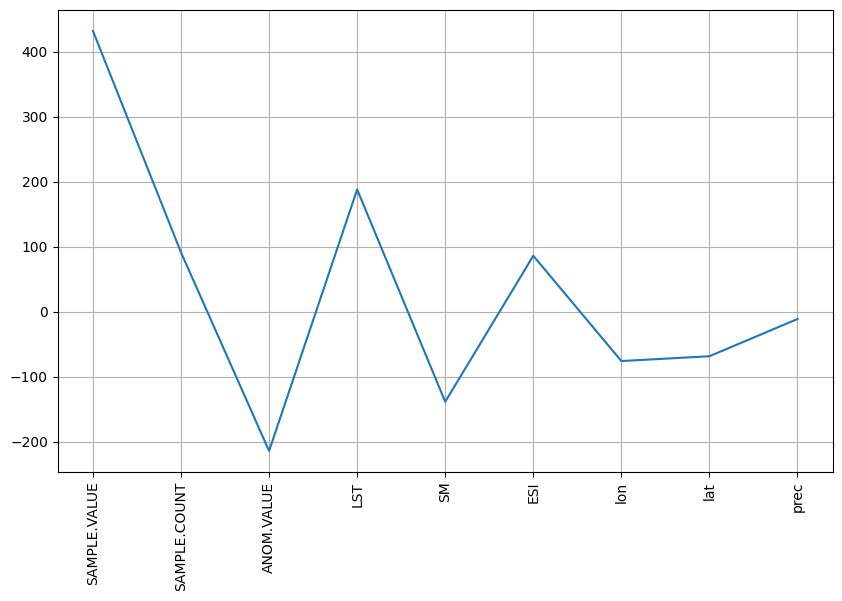

In [210]:
feature_labels = df2.drop(['Rice yield'],axis = 1).columns.values
plt.figure(figsize = (10, 6))
plt.plot(range(x.shape[1]), coeffs2)
plt.xticks(range(x.shape[1]), feature_labels, rotation = 90)
plt.grid()
plt.show()


In [241]:
feature_labels

array(['SAMPLE.VALUE', 'SAMPLE.COUNT', 'ANOM.VALUE', 'LST', 'SM', 'ESI',
       'lon', 'lat', 'prec'], dtype=object)

# Random Forest

In [212]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV

param_grid2 = {
    "n_estimators" : [50,60,65,70,75,100,120,130,350],
    "max_features" : [1.0, "sqrt", "log2"],
    "min_samples_split": [2,3,4,5,8],
    "bootstrap": [True, False]}
    

grid3 = GridSearchCV(RandomForestRegressor(random_state=0),param_grid2,
                     cv=KFold(n_splits=10, shuffle=True, random_state=9),n_jobs=-1, verbose=2,scoring='neg_mean_squared_error')
grid3.fit(x_train,y_train)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=9, shuffle=True),
             estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': [1.0, 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5, 8],
                         'n_estimators': [50, 60, 65, 70, 75, 100, 120, 130,
                                          350]},
             scoring='neg_mean_squared_error', verbose=2)

In [213]:
print(grid3.best_params_)
print('Mean test score: %.3f' % (grid3.best_score_))

{'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 100}
Mean test score: -2024.204


In [215]:
y_train_pred3= grid3.predict(x_train)
y_test_pred3 = grid3.predict(x_test) 

print('R^2 train: %.3f, test: %.3f' %
       (r2_score(y_train,y_train_pred3),
        r2_score(y_test, y_test_pred3)))
print('\n')
print('RMSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train,y_train_pred3,squared=False),
        mean_squared_error(y_test, y_test_pred3,squared=False)))

R^2 train: 0.983, test: 0.973


RMSE train: 34.004, test: 43.108


Text(0.5, 0, 'Feature Importance')

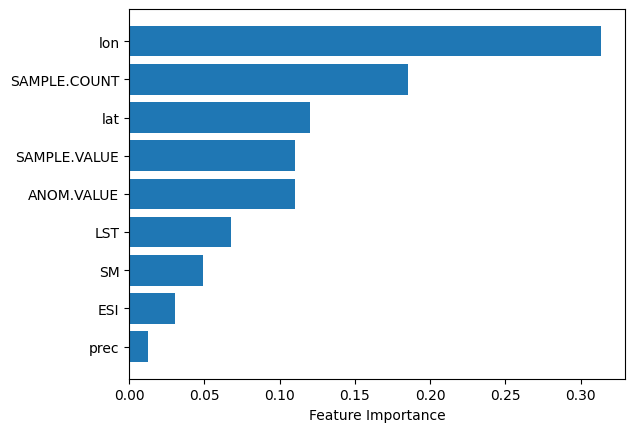

In [248]:
RF_model =  RandomForestRegressor(n_estimators=100,min_samples_split=8,max_features='sqrt',bootstrap = True,random_state=0)
RF_model.fit(x_train, y_train)

sorted_idx = RF_model.feature_importances_.argsort()
plt.barh(feature_labels[sorted_idx], RF_model.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance") 

Text(0.5, 0, 'Permutation Importance')

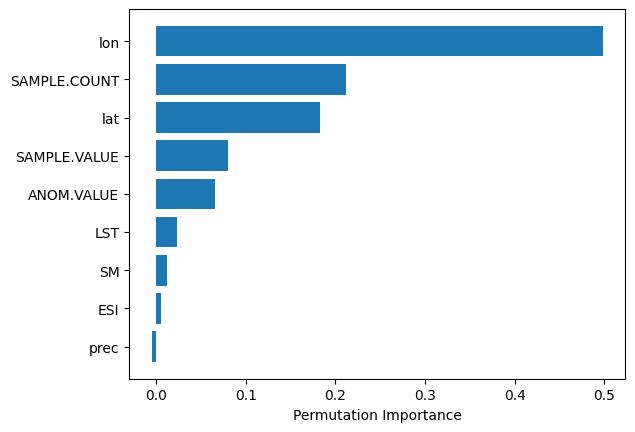

In [246]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(RF_model,x_test,y_test, n_repeats = 10,random_state=12)

sorted_idx2 = perm_importance.importances_mean.argsort()
plt.barh(feature_labels[sorted_idx2], perm_importance.importances_mean[sorted_idx2])
plt.xlabel("Permutation Importance")

# XGBoost

In [216]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold

param_grid3 = {
    "colsample_bytree" : [.3,.4,.5,.6,.7,.8],
    "learning_rate" : [.1, .2, .3],
    "n_estimators": [100,150,200,230,250,260,300,320,350,410],
    "max_depth": [3,5,7,9],
    "alpha": [4,5,6,7,8,10,20],
     "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]}

grid4 = RandomizedSearchCV(xgb.XGBRegressor(objective ='reg:squarederror'),param_grid3,n_jobs=-1,
                     cv=KFold(n_splits=10, shuffle=True, random_state=9), verbose=2,scoring='neg_mean_squared_error')
grid4.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=9, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=Non...
                                          predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'alpha': [4, 5, 6, 7, 8, 10, 20],
                                        'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 150, 200, 230,
                                                         250, 260, 300, 320,
                                                         350, 410]},
                   scoring='neg_mean_squared_error', verbose=2)

In [226]:
print(grid4.best_params_)
print('Mean test score: %.3f' % (grid4.best_score_) )

{'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.6, 'alpha': 20}
Mean test score: -1374.657


In [224]:
y_train_pred4 = grid4.predict(x_train)
y_test_pred4 = grid4.predict(x_test)

print('R^2 train: %.3f, test: %.3f' %
       (r2_score(y_train,y_train_pred4),
        r2_score(y_test, y_test_pred4)))

print('RMSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train,y_train_pred4,squared=False),
        mean_squared_error(y_test, y_test_pred4,squared=False)))

R^2 train: 0.982, test: 0.982
RMSE train: 35.746, test: 35.870


# Support Vector Machine

In [227]:
from sklearn.svm import SVR

param_grid4={
            'C': [100,150,200,250,290,300,310,350,375,380,400,430],
            'gamma': ['auto','scale',.001,.1,10],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'epsilon':[0.1,0.2,0.3,0.4,0.5],
             'degree' : [2,3,4,5,6,7], #Only applies to poly
             'coef0' : [0.01,0.02,0.1,0.2,0.3,0.4]} #only applies to poly and sigmoid


grid5 =RandomizedSearchCV(SVR(),param_grid4,cv=KFold(n_splits=10, shuffle=True, random_state=9),
                   n_jobs=-1, verbose=2,scoring='neg_mean_squared_error')
grid5.fit(x_train,y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END C=200, coef0=0.3, degree=5, epsilon=0.4, gamma=auto, kernel=sigmoid; total time= 3.4min
[CV] END C=200, coef0=0.3, degree=5, epsilon=0.4, gamma=auto, kernel=sigmoid; total time= 3.4min
[CV] END C=250, coef0=0.2, degree=4, epsilon=0.1, gamma=auto, kernel=sigmoid; total time= 3.5min
[CV] END C=200, coef0=0.3, degree=5, epsilon=0.4, gamma=auto, kernel=sigmoid; total time= 3.5min
[CV] END C=290, coef0=0.2, degree=2, epsilon=0.3, gamma=auto, kernel=sigmoid; total time= 3.5min
[CV] END C=290, coef0=0.2, degree=2, epsilon=0.3, gamma=auto, kernel=sigmoid; total time= 3.5min
[CV] END C=200, coef0=0.3, degree=5, epsilon=0.4, gamma=auto, kernel=sigmoid; total time= 3.5min
[CV] END C=250, coef0=0.2, degree=4, epsilon=0.1, gamma=auto, kernel=sigmoid; total time= 3.5min
[CV] END C=250, coef0=0.2, degree=4, epsilon=0.1, gamma=auto, kernel=sigmoid; total time= 3.6min
[CV] END C=250, coef0=0.2, degree=4, epsilon=0.1, gamma=auto, ke

[CV] END C=380, coef0=0.4, degree=4, epsilon=0.3, gamma=0.1, kernel=sigmoid; total time= 3.0min
[CV] END C=350, coef0=0.4, degree=3, epsilon=0.2, gamma=auto, kernel=poly; total time= 6.9min
[CV] END C=250, coef0=0.2, degree=4, epsilon=0.1, gamma=auto, kernel=sigmoid; total time= 3.2min
[CV] END C=350, coef0=0.4, degree=3, epsilon=0.2, gamma=auto, kernel=poly; total time= 7.4min
[CV] END C=150, coef0=0.1, degree=7, epsilon=0.1, gamma=auto, kernel=poly; total time=27.6min
[CV] END C=150, coef0=0.1, degree=7, epsilon=0.1, gamma=auto, kernel=poly; total time=28.5min
[CV] END C=150, coef0=0.1, degree=7, epsilon=0.1, gamma=auto, kernel=poly; total time=28.8min
[CV] END C=150, coef0=0.1, degree=7, epsilon=0.1, gamma=auto, kernel=poly; total time=29.2min
[CV] END C=150, coef0=0.1, degree=7, epsilon=0.1, gamma=auto, kernel=poly; total time=30.3min
[CV] END C=150, coef0=0.1, degree=7, epsilon=0.1, gamma=auto, kernel=poly; total time=31.7min
[CV] END C=150, coef0=0.1, degree=7, epsilon=0.1, gamma

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=9, shuffle=True),
                   estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [100, 150, 200, 250, 290, 300, 310,
                                              350, 375, 380, 400, 430],
                                        'coef0': [0.01, 0.02, 0.1, 0.2, 0.3,
                                                  0.4],
                                        'degree': [2, 3, 4, 5, 6, 7],
                                        'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5],
                                        'gamma': ['auto', 'scale', 0.001, 0.1,
                                                  10],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   scoring='neg_mean_squared_error', verbose=2)

In [228]:
print(grid5.best_params_)
print('Mean test score: %.3f' % (grid5.best_score_))

{'kernel': 'poly', 'gamma': 'auto', 'epsilon': 0.1, 'degree': 7, 'coef0': 0.1, 'C': 150}
Mean test score: -3741.660


In [229]:
y_train_pred5 = grid5.predict(x_train)
y_test_pred5 = grid5.predict(x_test) 
 
print('R^2 train: %.3f, test: %.3f' %
       (r2_score(y_train,y_train_pred5),
        r2_score(y_test, y_test_pred5)))

print('RMSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train,y_train_pred5,squared=False),
        mean_squared_error(y_test, y_test_pred5,squared=False)))

R^2 train: 0.947, test: 0.955
RMSE train: 60.670, test: 56.263
